# Imports

In [1]:
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

# Load Data

In [2]:
# Create pandas dataframe from csv
dfWT = pd.read_csv("../logs/v1/MainLog-1.1_WithTarjan.csv", sep=",", header=0)
dfNT = pd.read_csv("../logs/v1/MainLog-1.0_NoTarjan.csv", sep=",", header=0)
dfMinMaxK = pd.read_csv("../logs/v1/OverviewMinMaxK.csv", sep=",", header=0)
dfNandMCount = pd.read_csv("../logs/v1/NodesAndEdgesCount.csv", sep=",", header=0)

# Merge
dfWT = dfWT.merge(dfNandMCount, on = "name", how = 'inner')
dfNT = dfNT.merge(dfNandMCount, on = "name", how = 'inner')

# Split  synthetic/complex
dfWTSynthetic = dfWT[dfWT['name'].str.match('synth')]
dfWTComplex = dfWT[~dfWT['name'].str.match('synth')]
dfNTSynthetic = dfNT[dfNT['name'].str.match('synth')]
dfNTComplex = dfNT[~dfNT['name'].str.match('synth')]

# Mean
dfWT_mean_k = dfWT.groupby('k_optimal').mean()
dfNT_mean_k = dfNT.groupby('k_optimal').mean()
dfWT_mean_n = dfWT.groupby('n').mean()
dfNT_mean_n = dfNT.groupby('n').mean()
dfWT_mean_m = dfWT.groupby('m').mean()
dfNT_mean_m = dfNT.groupby('m').mean()

# Style plot
plt.style.use('dark_background')

# Print results

In [3]:
print(dfWT[dfWT['verified'] == False])

numSynthetic = dfWTSynthetic.shape[0]
dfWTSyntheticSolved = dfWTSynthetic[dfWTSynthetic['verified'] == True]
numSyntheticSolved = dfWTSyntheticSolved.shape[0]
print("Synthetic: " + str(numSyntheticSolved) + "/" + str(numSynthetic)
      + " (" + str(numSyntheticSolved / numSynthetic) + "%)")

numComplex = dfWTComplex.shape[0]
dfWTComplexSolved = dfWTComplex[dfWTComplex['verified'] == True]
numComplexSolved = dfWTComplexSolved.shape[0]
print("Complex: " + str(numComplexSolved) + "/" + str(numComplex)
      + " (" + str(numComplexSolved / numComplex) + "%)")

numGeneral = dfWT.shape[0]
dfWTSolved = dfWT[dfWT['verified'] == True]
numSolved = dfWTSolved.shape[0]
print("General: " + str(numSolved) + "/" + str(numGeneral)
      + " (" + str(numSolved / numGeneral) + "%)")

                                name  k_optimal  k_solved  millis  verified  \
38   synth-n_40-m_192-k_10-p_0.2.txt         10         0  180000     False   
39   synth-n_40-m_192-k_15-p_0.2.txt         13         0  180000     False   
56   synth-n_50-m_192-k_20-p_0.1.txt         11         0  180000     False   
61   synth-n_50-m_320-k_15-p_0.2.txt         14         0  180000     False   
62   synth-n_50-m_327-k_10-p_0.2.txt         10         0  180000     False   
64   synth-n_50-m_357-k_20-p_0.2.txt         20         0  180000     False   
108       biology-n_25-m_231-p_0.5-6         13         0  180000     False   
109      biology-n_25-m_231-p_0.75-6         13         0  180000     False   
114       biology-n_28-m_249-p_0.5-8         15         0  180000     False   
115      biology-n_28-m_249-p_0.75-8         13         0  180000     False   
120       biology-n_30-m_287-p_0.5-5         15         0  180000     False   
121      biology-n_30-m_287-p_0.75-5         12     

# Line Plot k (Tarjan vs No Tarjan)

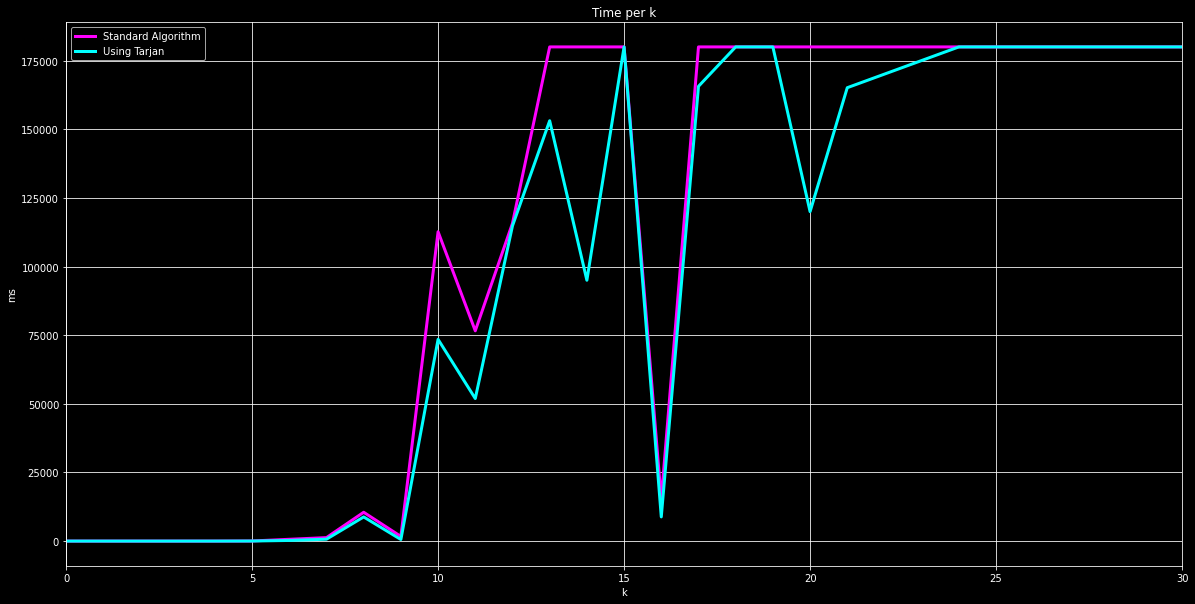

In [4]:
plt.figure(figsize=(20,10))
plt.plot(dfNT_mean_k['millis'], c='magenta', linewidth='3', label="Standard Algorithm")
plt.plot(dfWT_mean_k['millis'], c='aqua', linewidth='3', label="Using Tarjan")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.xlim([0, 30])
plt.grid()
plt.legend()
plt.savefig('plots/v1/KLinePlotTarjan.png',  bbox_inches='tight')
plt.show()

# Line Plot k (Complex vs Synthetic)

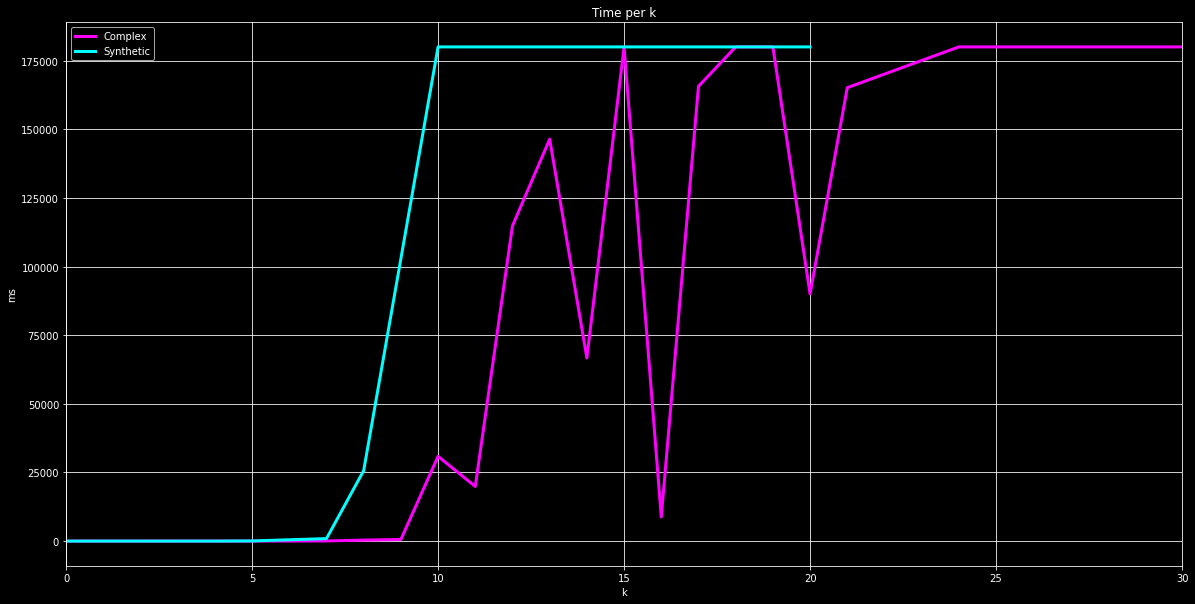

In [5]:
# Calculate mean for all k's
dfWTSyntheticMean = dfWTSynthetic.groupby('k_optimal').mean()
dfWTComplexMean = dfWTComplex.groupby('k_optimal').mean()

plt.figure(figsize=(20,10))
plt.plot(dfWTComplexMean['millis'], c='magenta', linewidth='3', label="Complex")
plt.plot(dfWTSyntheticMean['millis'], c='aqua', linewidth='3', label="Synthetic")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.xlim([0, 30])
plt.grid()
plt.legend()
plt.savefig('plots/v1/KLinePlotSyntheticComplex.png',  bbox_inches='tight')
plt.show()

# Boxplot k synthetic (Tarjan vs No Tarjan)

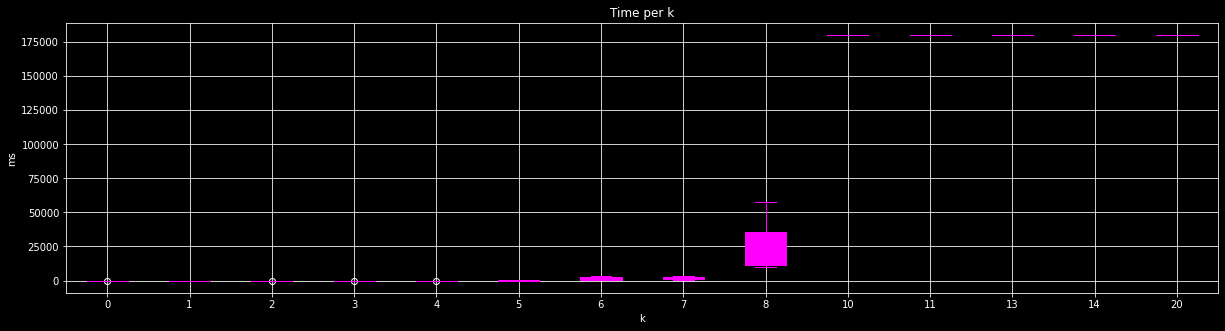

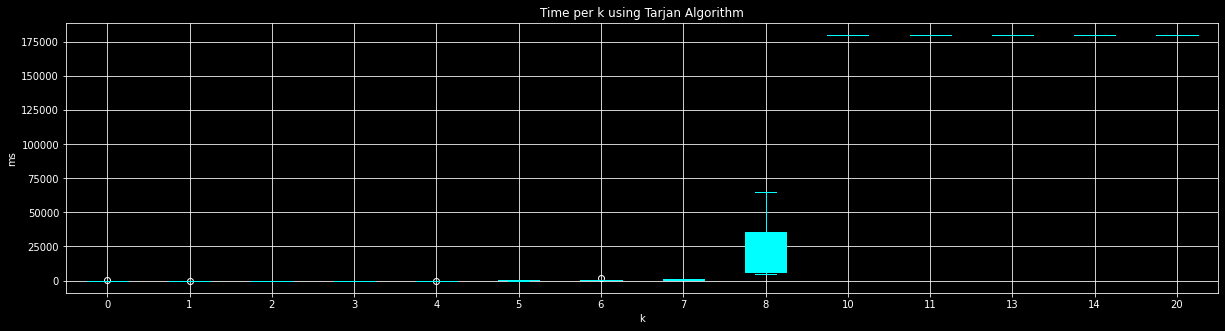

In [6]:
# Without Tarjan
axes = dfNTSynthetic.boxplot(column='millis', by='k_optimal', color='magenta', figsize=(20,5), patch_artist='True')
axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.savefig('plots/v1/KBoxPlotSyntheticNoTarjan.png',  bbox_inches='tight')
plt.show()

# With Tarjan
axes = dfWTSynthetic.boxplot(column='millis', by='k_optimal', color='aqua', figsize=(20,5), patch_artist='True')
axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k using Tarjan Algorithm')
plt.savefig('plots/v1/KBoxPlotSyntheticTarjan.png',  bbox_inches='tight')
plt.show()

# Boxplot k complex (Tarjan vs No Tarjan)

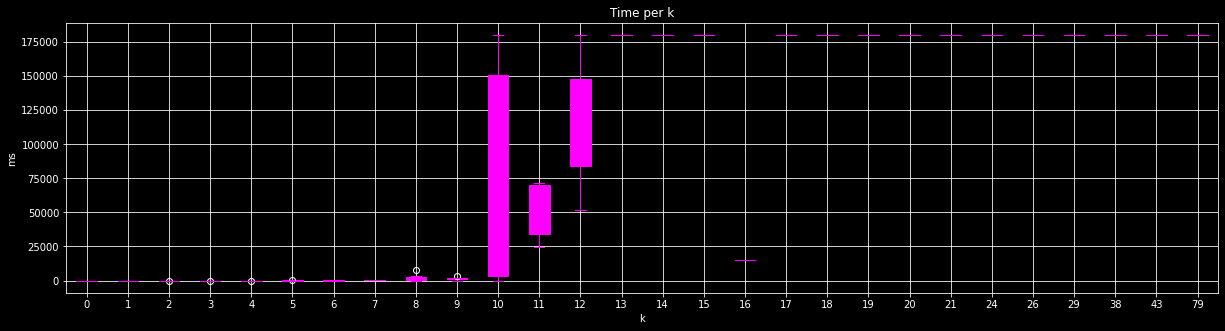

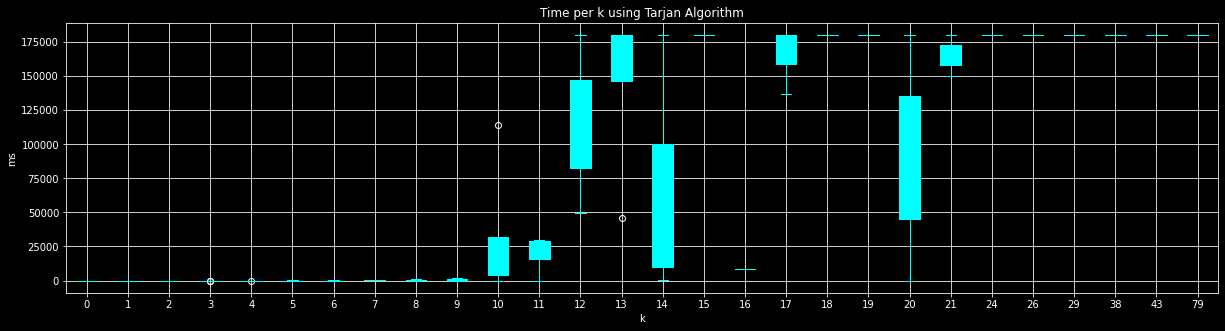

In [7]:
# Without Tarjan
axes = dfNTComplex.boxplot(column='millis', by='k_optimal', color='magenta', figsize=(20,5), patch_artist='True')
axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.savefig('plots/v1/KBoxPlotComplexNoTarjan.png',  bbox_inches='tight')
plt.show()

# With Tarjan
axes = dfWTComplex.boxplot(column='millis', by='k_optimal', color='aqua', figsize=(20,5), patch_artist='True')
axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k using Tarjan Algorithm')
plt.savefig('plots/v1/KBoxPlotComplexTarjan.png',  bbox_inches='tight')
plt.show()

# Line Plot for n

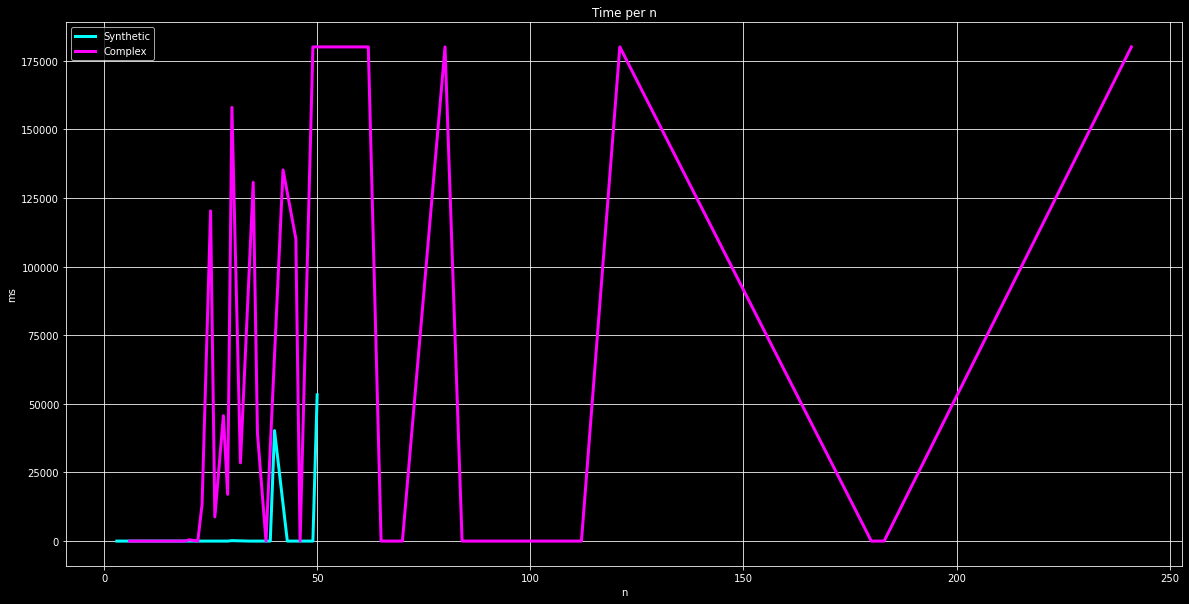

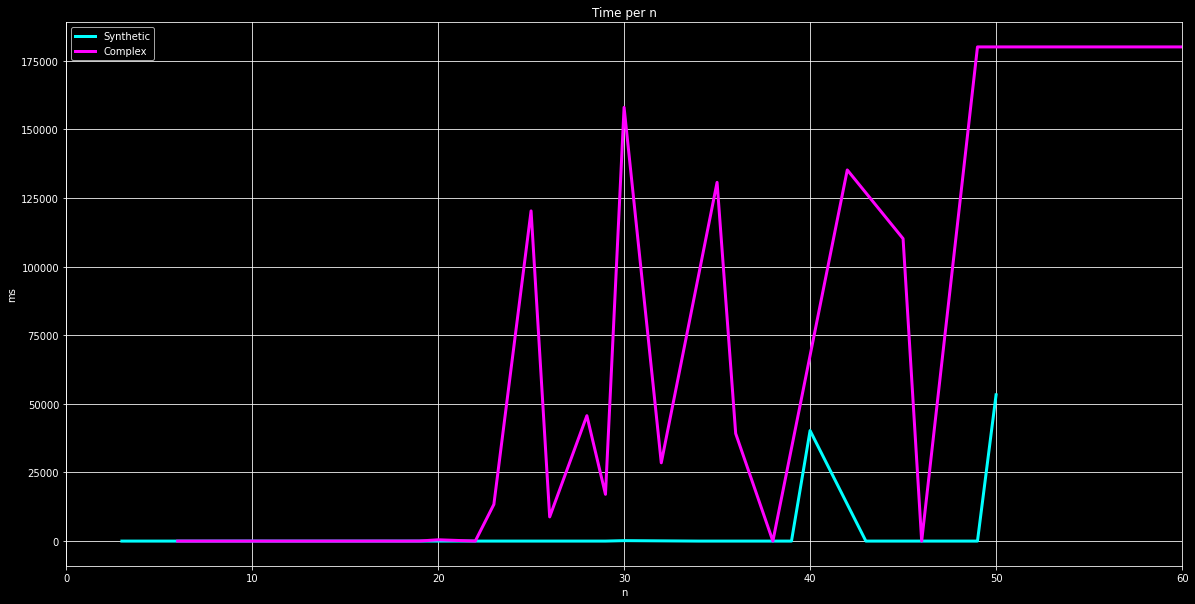

In [8]:
dfWTSyntheticMeanN = dfWTSynthetic.groupby('n').mean()
dfWTComplexMeanN = dfWTComplex.groupby('n').mean()

plt.figure(figsize=(20,10))
plt.plot(dfWTSyntheticMeanN['millis'], c='aqua', linewidth='3', label='Synthetic')
plt.plot(dfWTComplexMeanN['millis'], c='magenta', linewidth='3', label='Complex')
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per n')
plt.grid()
plt.legend()
plt.savefig('plots/v1/NLinePlot_1.png',  bbox_inches='tight')
plt.show()


plt.figure(figsize=(20,10))
plt.plot(dfWTSyntheticMeanN['millis'], c='aqua', linewidth='3', label='Synthetic')
plt.plot(dfWTComplexMeanN['millis'], c='magenta', linewidth='3', label='Complex')
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per n')
plt.grid()
plt.legend()
plt.xlim([0, 60])
plt.savefig('plots/v1/NLinePlot_2.png',  bbox_inches='tight')
plt.show()

# Line Plot for m

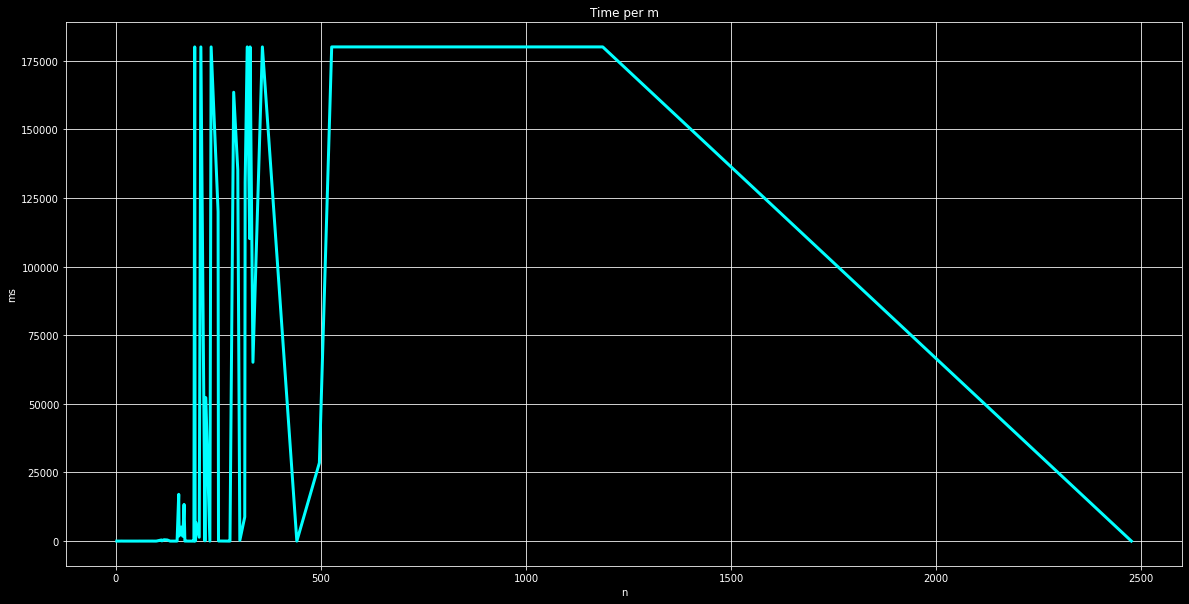

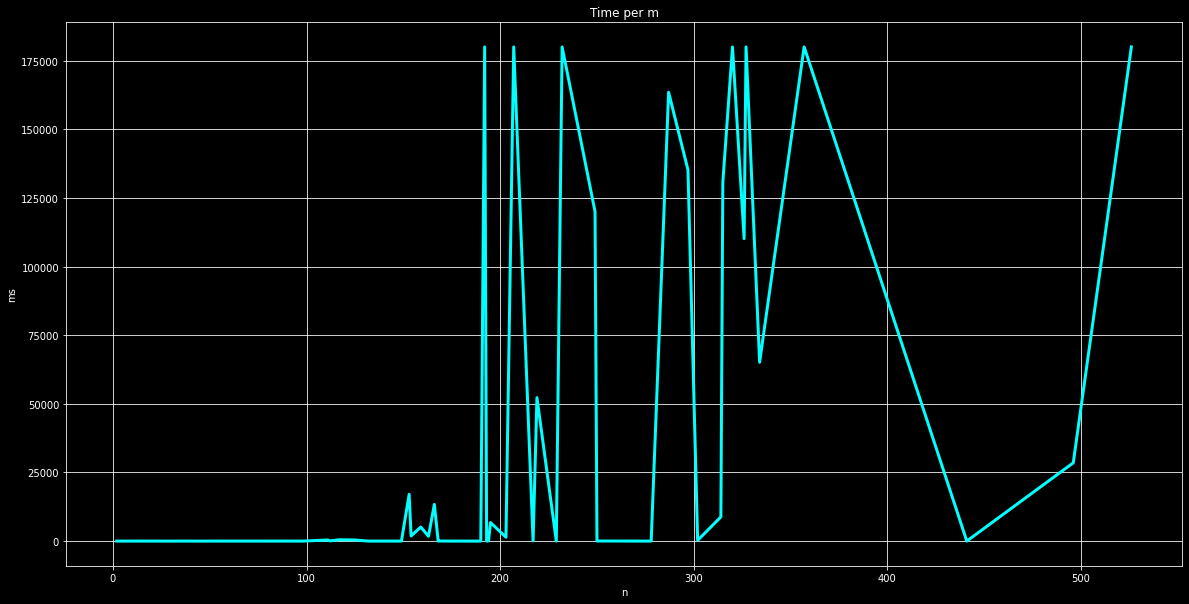

In [9]:
plt.figure(figsize=(20,10))
plt.plot(dfWT_mean_m['millis'], c='aqua', linewidth='3')
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per m')
plt.grid()
plt.savefig('plots/v1/MLinePlot_1.png',  bbox_inches='tight')
plt.show()

dfNT_mean_m_cropped = dfNT_mean_m[dfNT_mean_m.index <= 550]
dfWT_mean_m_cropped = dfWT_mean_m[dfWT_mean_m.index <= 550]

plt.figure(figsize=(20,10))

plt.plot(dfWT_mean_m_cropped['millis'], c='aqua', linewidth='3')
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per m')
plt.grid()
plt.savefig('plots/v1/MLinePlot_2.png',  bbox_inches='tight')
plt.show()

# K-Value Borders

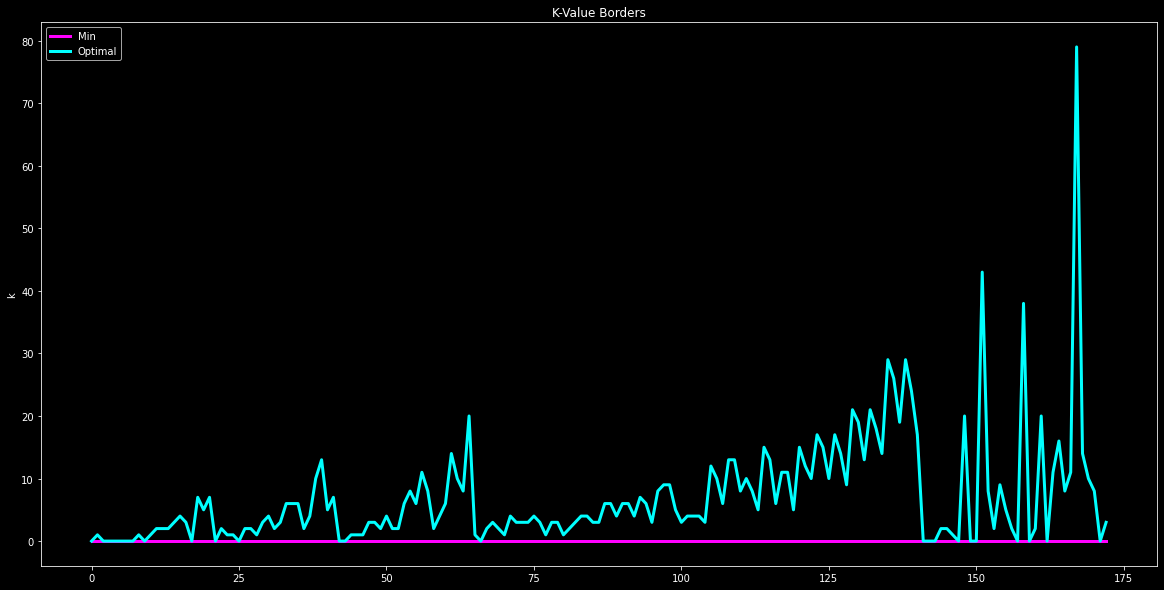

In [10]:
# K-Value Borders
plt.figure(figsize=(20,10))
plt.plot(dfMinMaxK["min"], c = 'magenta', linewidth='3', label="Min")
plt.plot(dfMinMaxK["optimal"], c = 'aqua', linewidth='3', label="Optimal")
plt.title('K-Value Borders')
plt.ylabel('k')
plt.legend()
plt.savefig('plots/v1/MinLinePlot_1.png',  bbox_inches='tight')
plt.show()